# Simple Moving Average (SMA)

The [SMA filter](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average) can be used for removing noise from a data set and producing a smooth curve, for example.

### Import the required stuff

In [1]:
# plot the figures at the notebook
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

### Create a dataset

In [3]:
np.linspace?

In [4]:
# number of data
ndata = 200

# coordinates
x = np.linspace(0., 2*np.pi, ndata)

# noise-free data
data = 0.4*np.sin(x) + 0.5*np.cos(3*x)

# noisy data
data_noisy = data + np.random.normal(loc=0., scale=0.1, size=ndata)

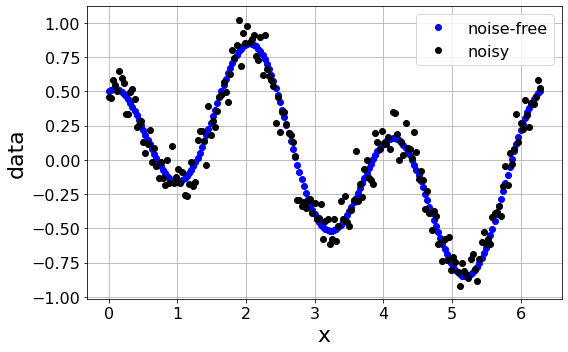

In [5]:
fig = plt.figure(figsize=(8,5))

plt.plot(x, data, 'ob', linewidth = 1., label='noise-free')
plt.plot(x, data_noisy, 'ok', linewidth = 1., label='noisy')
plt.ylabel('data', fontsize = 22)
plt.xlabel('x', fontsize = 22)

plt.legend(loc='best', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()

fig.tight_layout()

plt.show()  

### Set the window size

In [6]:
# consider windows with odd sizes and greater than 3
window_size = 5

### SMA filter

In [7]:
# lost points at the extremities
i0 = window_size//2

# non-null data
N = data.size - 2*i0

filtered_data = np.empty_like(data_noisy)

filtered_data[:i0] = 0.
filtered_data[-1:-i0-1:-1] = 0.

for i in range(N):
    filtered_data[i0+i] = np.mean(data_noisy[i:i+window_size])

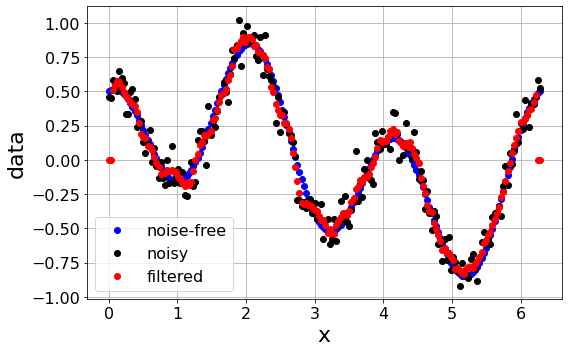

In [8]:
fig = plt.figure(figsize=(8,5))

plt.plot(x, data, 'ob', linewidth = 2., label='noise-free')
plt.plot(x, data_noisy, 'ok', linewidth = 1., label='noisy')
plt.plot(x, filtered_data, 'or', linewidth = 2., label='filtered')
plt.ylabel('data', fontsize = 22)
plt.xlabel('x', fontsize = 22)

plt.legend(loc='best', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()

fig.tight_layout()

plt.show()  

### Example of function for plotting

In [9]:
def plot(x, y, z = None, w = None, labely = None, labelz = None, labelw = None):
    '''
    Plot two superposed graphs of y, z and w gainst x.
    
    input
    x: numpy array 1D - abscissa values.
    y: numpy array 1D - ordinate values of the first data set.
    z: numpy array 1D - ordinate values of the second data 
       set (default is None).
    w: numpy array 1D - ordinate values of the third data 
       set (default is None).
    labely: string - label of the first data set (default is None).
    labelz: string - label of the second data set (default is None).
    labelw: string - label of the third data set (default is None).
    
    output
    matplotlib figure
    '''
    
    fig = plt.figure(figsize=(8,5))

    if labely is not None:
        plt.plot(x, y, 'ob', linewidth = 1., label=labely)
    else:
        plt.plot(x, y, 'ob', linewidth = 1.)
        
    if z is not None:
        if labelz is not None:
            plt.plot(x, z, 'ok', linewidth = 1., label=labelz)
        else:
            plt.plot(x, z, 'ok', linewidth = 1.)
            
    if w is not None:
        if labelw is not None:
            plt.plot(x, w, 'or', linewidth = 1., label=labelw)
        else:
            plt.plot(x, w, 'or', linewidth = 1.)
    
    plt.ylabel('data', fontsize = 22)
    plt.xlabel('x', fontsize = 22)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.grid()

    plt.legend(loc='best', fontsize=16)

    fig.tight_layout()

    plt.show()    

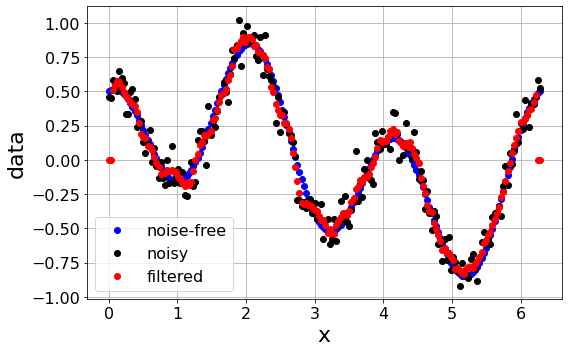

In [10]:
plot(x, data, data_noisy, filtered_data,
     labely='noise-free', labelz='noisy', labelw='filtered')